<a href="https://colab.research.google.com/github/lllana/Analyzing_a_Market_Test/blob/master/NG_test_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task description: 
Please write a script in either R, Python, Julia (or another programming language if you prefer!) to
analyse this data. It should:
1. Read the data in national_gallery_data_analyst_task.csv
2. Filter to only visits from the week 16 th May 2022 to 22 nd May 2022.
3. Classify bookings into those from United Kingdom residents and those from international
visitors.
4. Total-up how many people from each region visited the gallery. Count international visitors
(all non-UK countries) as a region by itself. Present these figures in a table and graph.
5. Investigate the distribution of visit duration. Your investigation might involve choosing
appropriate summary statistics or visualisations.
o For context, people would rarely spend more than a few hours at the Gallery, but
usually at least half an hour.
6. Building on part 5, look into either:
o When is the Gallery busiest (time of day/day of week)?
o Do visitors from London take shorter/longer visits than others?
o Or formulate and answer your own analysis question.

The task is completed by Lana Rubchenia on 13th of June 2022.
Time duration: 2h 40 min

In [ ]:
#downloading libraries

import pandas as pd
import numpy as np
from datetime import datetime as dt
import statistics

import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleanse / Data preparation




In [ ]:
#Data studying

df = pd.read_csv('ng.csv')

print(df.info())
print()
print('Duplicates:', df.duplicated().sum())
print()

display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61739 entries, 0 to 61738
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   visit_id       61739 non-null  int64 
 1   time_of_entry  61739 non-null  object
 2   time_of_exit   61739 non-null  object
 3   home_country   61739 non-null  object
 4   home_region    49504 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.4+ MB
None

Duplicates: 0



,visit_id,time_of_entry,time_of_exit,home_country,home_region
0,1,2022-05-12T09:02:04Z,2022-05-12T10:37:06Z,United Kingdom,London
1,2,2022-05-12T09:01:25Z,2022-05-12T10:32:08Z,United Kingdom,London
2,3,2022-05-12T09:00:46Z,2022-05-12T09:52:28Z,United Kingdom,London
3,4,2022-05-12T09:03:15Z,2022-05-12T10:24:00Z,United Kingdom,London
4,5,2022-05-12T09:00:11Z,2022-05-12T11:01:33Z,United Kingdom,London


The data is presented in 5 columns and 61738 rows without duplicates.

**There is one column with missing data:** home_region (only filled out for visitors from
the United Kingdom).

**Data is presented in two data types:** int64, object. time_of_entry and time_of_exit should be changed to datetime.

### Filling the missing data: home_region

In [ ]:
#Check that 'home_country' is filled only for visitors from UK. 
notuk_df = df[df['home_country'] != 'United Kingdom']
print('Regions values for Non-UK residents:', notuk_df['home_region'].unique())
print()
uk_df = df[df['home_country'] == 'United Kingdom']
print('Regions values for UK residents:',uk_df['home_region'].unique())

#Fill in missing region values as 'Not UK'
df['home_region'] = df['home_region'].fillna(value='Not UK')

Regions values for Non-UK residents: [nan]

Regions values for UK residents: ['London' 'Yorkshire and the Humber' 'West Midlands' 'South West'
 'East of England' 'North West' 'Northern Ireland' 'South East'
 'North East' 'Scotland' 'East Midlands' 'Wales']


### Converting to datetime and preparing datetime data for analysis

In [ ]:
#Convert to datetime
df['time_of_entry'] = pd.to_datetime(df['time_of_entry'], format='%Y-%m-%d')
df['time_of_exit'] = pd.to_datetime(df['time_of_exit'], format='%Y-%m-%d')

#separating columns to indicate only dates
df['date_of_entry'] = df['time_of_entry'].dt.floor('d')
df['date_of_exit'] = df['time_of_exit'].dt.floor('d')

#Filter the data as per task description: 16th May 2022 to 22nd May 2022.
df_dates = df[(df['time_of_entry'] > '2022-05-16') & (df['time_of_entry'] < '2022-05-23')]

df_dates.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38937 entries, 12038 to 61738
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   visit_id       38937 non-null  int64              
 1   time_of_entry  38937 non-null  datetime64[ns, UTC]
 2   time_of_exit   38937 non-null  datetime64[ns, UTC]
 3   home_country   38937 non-null  object             
 4   home_region    38937 non-null  object             
 5   date_of_entry  38937 non-null  datetime64[ns, UTC]
 6   date_of_exit   38937 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](4), int64(1), object(2)
memory usage: 2.4+ MB


Normally, I would discuss whether a treshhold for visit duration should be defined and included into analysis. 

## Analysis of visits by date & country of residence

In [ ]:
#Total Visits by date
visitors_day = df_dates.groupby('date_of_entry')['visit_id'].count().reset_index()

#UK Visits by date
uk_visits = df_dates[df_dates['home_country'] == 'United Kingdom']

uk_visitors_day = uk_visits.groupby('date_of_entry')['visit_id'].count().reset_index()
uk_visitors_day

#Merging tables to analyse UK visits vs other residents
visit_analysis = pd.merge(visitors_day, uk_visitors_day, left_on='date_of_entry', right_on='date_of_entry', how='left')
visit_analysis = visit_analysis.set_axis(['date_of_entry', 'Total_visitors','UK_residents'], axis=1, inplace=False)

visit_analysis['UK_visitors%'] = (visit_analysis['UK_residents']/ visit_analysis['Total_visitors'])*100
display(visit_analysis)

,date_of_entry,Total_visitors,UK_residents,UK_visitors%
0,2022-05-16 00:00:00+00:00,5393,4311,79.936955
1,2022-05-17 00:00:00+00:00,5366,4298,80.096906
2,2022-05-18 00:00:00+00:00,5397,4318,80.007412
3,2022-05-19 00:00:00+00:00,5392,4296,79.673591
4,2022-05-20 00:00:00+00:00,6603,5368,81.296380
5,2022-05-21 00:00:00+00:00,5368,4289,79.899404
6,2022-05-22 00:00:00+00:00,5418,4324,79.808047


For the defined period of time, 79-81% of visitors are UK residents. The highest number of UK visitors (81.3%) was on Friday (20th May 2022), while lowest (79.7%) was on Thursday (19th May 2022).

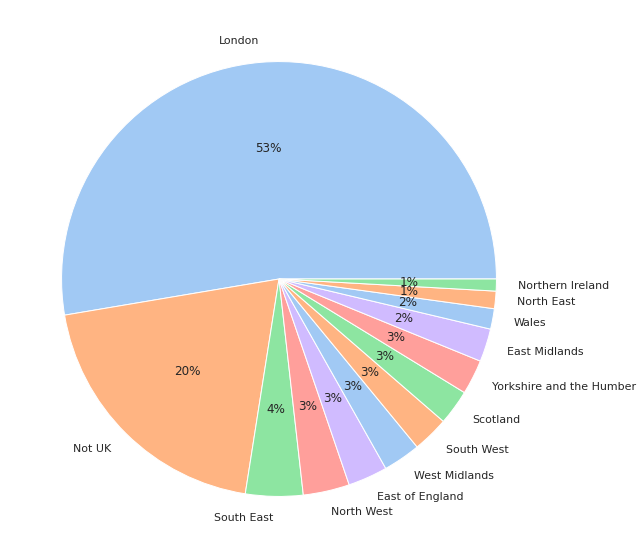

In [ ]:
visitors_by_reg = df_dates.groupby('home_region')['visit_id'].count().reset_index().sort_values(by='visit_id', ascending=False)
visitors_by_reg

#Creating a pie chart
plt.figure(figsize=(20,10))

#define Seaborn color palette
colors = sns.color_palette('pastel')[0:5]

plt.pie(visitors_by_reg['visit_id'], labels =visitors_by_reg['home_region'],  colors = colors, autopct='%.0f%%')
plt.show()

the highest number of visitors are presented by Londoners (53%), followed by international viitors (20%). 

The rest of visitors (27%) are from other 11 UK regions.

In [ ]:
#checking the length of the visit
df_dates['visit_length'] = df_dates['time_of_exit'] - df_dates['time_of_entry']

print('The longest visit:', df_dates['visit_length'].max())
print('The shortest visit:', df_dates['visit_length'].min())

print('Median:',statistics.median(df_dates['visit_length']))

display(df_dates['visit_length'].describe())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The longest visit: 0 days 04:00:00
The shortest visit: 0 days 00:00:01
Median: 0 days 01:05:34


count                        38937
mean     0 days 01:15:24.660888101
std      0 days 00:48:34.517817133
min                0 days 00:00:01
25%                0 days 00:38:26
50%                0 days 01:05:34
75%                0 days 01:42:19
max                0 days 04:00:00
Name: visit_length, dtype: object

50% of visitors spend from 38 min to 1h 42 min. 25% of users spend less that 40 mins and the remaining 25% stay in the gallery longer than 1h 42 min. 
The longest visit is 4 hours. 

The shortest visit is 1 sec and might be an indication of technical issues, therefore should be analysed further.

In [ ]:
# convert time delta into min
df_dates['visit_length'] = df_dates['visit_length'].astype('timedelta64[s]')/60

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of visits duration')

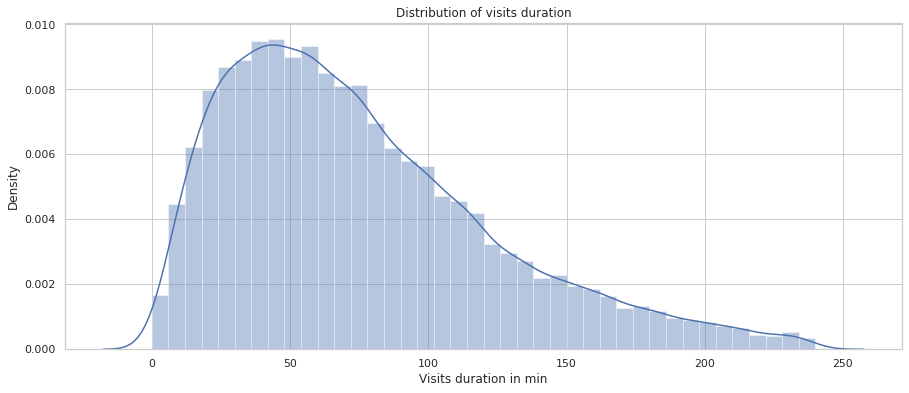

In [ ]:
#building the distribution of visits duration

data = pd.Series(df_dates['visit_length'] , name="Visits duration in min")

plt.figure(figsize=(15,6))
ax = sns.distplot(data,bins=40)
plt.title("Distribution of visits duration")

as the distribution of the data is skewed to the right, we should take into account the median (the most frequent duration of visits) - Median: 0 days 01:05:34, rather than mean value (0 days 01:15:24) as it is being affected by the outliers on the left.

## Stadying the busiest time in the gallery

In [ ]:
#data prepartion: truncate the time to the hour & extract only time
df_dates['time_only_entry'] = df_dates['time_of_entry'].dt.floor('h').dt.strftime("%H:%M:%S")

# Grouping visitors by date and time
visits_gr = df_dates.groupby(['date_of_entry', 'time_only_entry']).agg({'visit_id': ['count']}).reset_index()
visits_gr['date_of_entry'] = visits_gr['date_of_entry'].dt.date

#renaming columns
visits_gr = visits_gr.set_axis(['date_of_entry', 'time_of_entry','visit_count'], axis=1, inplace=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Building a pivot for a heatmap graph

visits_gr = visits_gr.pivot(index='time_of_entry', columns='date_of_entry', values='visit_count')

Text(0.5, 1.0, 'Distribution of visits')

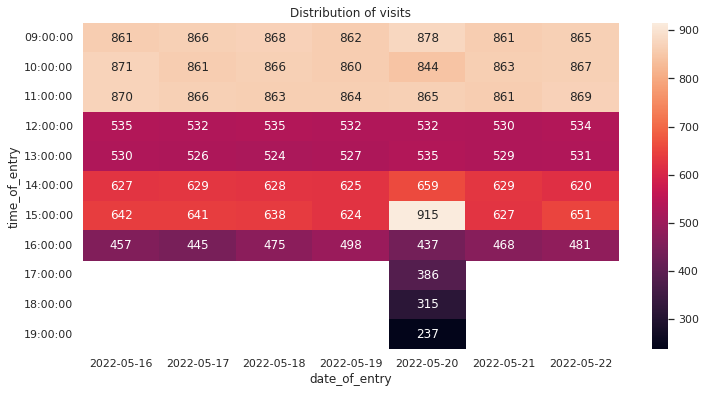

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(visits_gr,annot=True, fmt='g')
plt.title("Distribution of visits")

During the given period, the most busiesttime is at 3-4pm on Friday (20th of May 22) with 915 visitors. Morning (from 9 am to 12 am) shows the consistently high number of visitors: 850-870 visitors per hour.

During a lucnh time 12 am - 2 pm there is a drastic descrease of visitors with a slight increase from 2 pm to 4 pm. The least busiest time is in the last working hour/s. 